In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid,X_train = X_train_full[:5000]/255.0, X_train_full[5000:] / 255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [5]:
class_names = ['t-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [9]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7147 - accuracy: 0.7655 - val_loss: 0.5157 - val_accuracy: 0.8300
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4873 - accuracy: 0.8314 - val_loss: 0.4701 - val_accuracy: 0.8376
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4414 - accuracy: 0.8453 - val_loss: 0.4314 - val_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4145 - accuracy: 0.8553 - val_loss: 0.4239 - val_accuracy: 0.8522
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3932 - accuracy: 0.8616 - val_loss: 0.3812 - val_accuracy: 0.8666
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3789 - accuracy: 0.8657 - val_loss: 0.3690 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3651 - accuracy: 0.8710 - val_loss: 0.3762 - val_accuracy:

<AxesSubplot:>

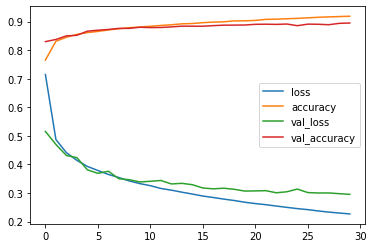

In [10]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [11]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2227 - accuracy: 0.9208 - val_loss: 0.2985 - val_accuracy: 0.8918
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2193 - accuracy: 0.9220 - val_loss: 0.3237 - val_accuracy: 0.8794
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2152 - accuracy: 0.9238 - val_loss: 0.3125 - val_accuracy: 0.8870
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2117 - accuracy: 0.9247 - val_loss: 0.3009 - val_accuracy: 0.8898
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.2083 - accuracy: 0.9262 - val_loss: 0.2931 - val_accuracy: 0.8938
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2064 - accuracy: 0.9260 - val_loss: 0.2982 - val_accuracy: 0.8902
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2020 - accuracy: 0.9279 - val_loss: 0.2939 - val_accuracy:

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 70.4635 - accuracy: 0.8586


[70.46354675292969, 0.8586000204086304]

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)